In [1]:
# Install all required libraries

import sys
!{sys.executable} -m pip install pulp 

import pulp
# Import PuLP modeler functions
from pulp import * 

import numpy as np
import math as math
import networkx as nx
import matplotlib.pyplot as plt

## The Decision Variables and Objective Function 

In [2]:
problem = LpProblem("CMST_Problem",LpMinimize)

In [3]:
# Graph of edges. The edges are the decision variables
edges_weights = np.array([
 [0,7,9,14,0,15,5,1,0], #root
 [0,0,16,0,15,0,0,0,0], 
 [0,16,0,0,0,3,0,0,0],
 [0,0,0,0,0,0,2,11,6],
 [0,15,0,0,0,0,0,10,4],
 [0,0,3,0,0,0,8,0,0],
 [0,0,0,2,0,8,0,0,0],
 [0,0,0,11,10,0,0,0,0],
 [0,0,0,6,0,0,0,0,0]
])

nodes = ['R', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
edges = ['RA', 'RB', 'RC', 'RE', 'RF', 'RG', 'AB', 'AD', 'BA', 'BE', 'CF', 'CG', 'CH', 'DA', 'DG', 'DH', 'EB', 'EF', 'FC', 'FE', 'GC', 'GD','HC']
numOfRows = np.size(edges_weights, 0)
numOfCols = np.size(edges_weights, 1)

# For every entry in edges_weights is a decision variable
temp = []
for i in range(0,numOfRows):
    for j in range(0,numOfCols):
        if edges_weights[i][j] != 0:
            temp.append(edges_weights[i][j])

edge_costs = {}
for i in range(0, len(edges)):
    edge_costs[edges[i]] = temp[i]

edge_vars = LpVariable.dicts("edge",edges,lowBound=0)
print(edge_vars)

# Capacity constraint
K = 3

## OBJECTIVE FUNCTION
problem += lpSum([edge_vars[i]*edge_costs[i] for i in edge_costs])


{'RA': edge_RA, 'RB': edge_RB, 'RC': edge_RC, 'RE': edge_RE, 'RF': edge_RF, 'RG': edge_RG, 'AB': edge_AB, 'AD': edge_AD, 'BA': edge_BA, 'BE': edge_BE, 'CF': edge_CF, 'CG': edge_CG, 'CH': edge_CH, 'DA': edge_DA, 'DG': edge_DG, 'DH': edge_DH, 'EB': edge_EB, 'EF': edge_EF, 'FC': edge_FC, 'FE': edge_FE, 'GC': edge_GC, 'GD': edge_GD, 'HC': edge_HC}


In [4]:
# For the first constraint, we want the sum of all elements in each column of E, except column 0, to be equal to 1
# i.e. the sum of all elements in a column j must equal 1 for all j in V+

gates = {}
A_edges = {}
B_edges = {}
C_edges = {}
D_edges = {}
E_edges = {}
F_edges = {}
G_edges = {}
H_edges = {}

hold = [gates, A_edges, B_edges, C_edges, D_edges, E_edges, F_edges, G_edges, H_edges]

def sort_edges(edgedict, letter):
    for i in edge_vars:
        if (i.startswith(letter)):
            edgedict[i] = edge_vars[i]
    return edgedict

def sort_edges_lastletter(edgedict, letter):
    for i in edge_vars:
        if (i.endswith(letter)):
            edgedict[i] = edge_vars[i]
    return edgedict
    
for i in range(0, len(hold)):
    if i == 0:
        hold[i] = sort_edges(hold[i], nodes[i])
    else:
        hold[i] = sort_edges_lastletter(hold[i], nodes[i])
        
        
        
def addConstraint(edgevars, edges, prob):
    prob += lpSum([edgevars[i] for i in edges]) == 1
    
for i in range(0, len(hold)):
    if i != 0:
        hold[i] = addConstraint(edge_vars, hold[i], problem)

# Prevent loops constraint

tempdict = {}
for i in edge_vars:
    for j in edge_vars:
        if j == i[::-1]:
            tempdict[i] = edge_vars[i]
            tempdict[j] = edge_vars[j]
            problem += lpSum([edge_vars[l] for l in tempdict]) <= 1
            tempdict.clear()


# For the second constraint, we let d be a list of integers with the entries being the demands of each node
# Here the nodes are unit weight.
d = []
for i in range(0, numOfRows-1):
    d.append(1)

# Now, we want to sum all elements in d and divide that sum by the capacity constraint K. Afterwards, we apply the
# the ceiling fn to this expression in order to get the minimum number of subtrees necessary to satisfy the capacity 
# constraint.
minNumSubtrees = math.ceil(sum(d)/K) + 1

# the second constraint would be the number of subtrees >= the minimium number of subtrees necessary for K
# example: n_s >= min_s_K
problem += lpSum([gates[i] for i in gates]) >= minNumSubtrees , "Subtree Constraint"



print(problem)


CMST_Problem:
MINIMIZE
16*edge_AB + 15*edge_AD + 16*edge_BA + 3*edge_BE + 2*edge_CF + 11*edge_CG + 6*edge_CH + 15*edge_DA + 10*edge_DG + 4*edge_DH + 3*edge_EB + 8*edge_EF + 2*edge_FC + 8*edge_FE + 11*edge_GC + 10*edge_GD + 6*edge_HC + 7*edge_RA + 9*edge_RB + 14*edge_RC + 15*edge_RE + 5*edge_RF + 1*edge_RG + 0
SUBJECT TO
_C1: edge_BA + edge_DA + edge_RA = 1

_C2: edge_AB + edge_EB + edge_RB = 1

_C3: edge_FC + edge_GC + edge_HC + edge_RC = 1

_C4: edge_AD + edge_GD = 1

_C5: edge_BE + edge_FE + edge_RE = 1

_C6: edge_CF + edge_EF + edge_RF = 1

_C7: edge_CG + edge_DG + edge_RG = 1

_C8: edge_CH + edge_DH = 1

_C9: edge_AB + edge_BA <= 1

_C10: edge_AD + edge_DA <= 1

_C11: edge_AB + edge_BA <= 1

_C12: edge_BE + edge_EB <= 1

_C13: edge_CF + edge_FC <= 1

_C14: edge_CG + edge_GC <= 1

_C15: edge_CH + edge_HC <= 1

_C16: edge_AD + edge_DA <= 1

_C17: edge_DG + edge_GD <= 1

_C18: edge_BE + edge_EB <= 1

_C19: edge_EF + edge_FE <= 1

_C20: edge_CF + edge_FC <= 1

_C21: edge_EF + edge_FE <

In [5]:
problem.solve()
print("Status:",LpStatus[problem.status])

for a in problem.variables():
    #print(a.name,"=",a.varValue)
    if (a.varValue != 0.0):
        print(a.name,"=",a.varValue)
    
print("Optimal area amount = ",value(problem.objective))

Status: Optimal
edge_BE = 1.0
edge_DH = 1.0
edge_FC = 1.0
edge_GD = 1.0
edge_RA = 1.0
edge_RB = 1.0
edge_RF = 1.0
edge_RG = 1.0
Optimal area amount =  41.0


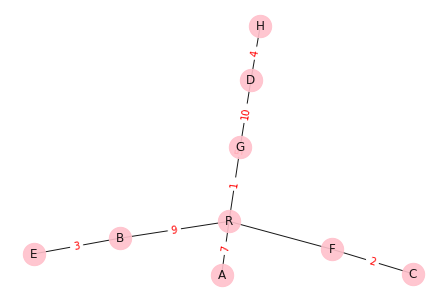

In [6]:
## The proposed solution is written here and graphed.

soln_edges = [['B', 'E'],['D', 'H'],['F', 'C'],['G', 'D'],['R', 'A'],['R', 'B'], ['R','F'], ['R','G']]
G = nx.Graph()
G.add_edges_from(soln_edges)
pos = nx.spring_layout(G)
plt.figure()
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={('B', 'E'): '3', 
                 ('D', 'H'): '4', 
                 ('F', 'C'): '2',
                 ('G', 'D'): '10',
                 ('R', 'A'): '7',
                 ('R', 'B'): '9',
                 ('R', 'D'): '5',
                 ('R', 'G'): '1'},
    font_color='red'
)
plt.axis('off')
plt.show()